# Load the data

In [1]:
import pandas as pd

In [2]:
# Load the data
data = pd.read_csv('penguins.csv')

# Display the first few rows of the dataset
print(data.head())

   rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  


# Understanding the data structure

In [3]:
# Basic info about the dataset
print(data.info())

# Summary statistics for numerical features
print(data.describe())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB
None
            rowid  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count  344.000000      342.000000     342.000000         342.000000   
mean   172.500000       43.921930      17.151170         200.915205   
std     99.448479        5.459584       1.974793          14.061714   
min      1.00000

# Visualization
## Distribution of features

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

As seen from the histogram below, some observations can be made:
- Bill Length (mm): The histogram shows a fairly normal distribution with a slight right skew, suggesting most penguins have a bill length around the 40-45 mm range, with fewer penguins having longer bills.
- Bill Depth (mm): This distribution appears multimodal, indicating that there might be distinct groups within the data, possibly corresponding to different species.
- Flipper Length (mm): Similar to bill depth, the flipper length shows a bimodal distribution, which might also reflect differences between species.
- Body Mass (g): The body mass histogram is right-skewed, indicating that most penguins are of a lighter weight, with fewer heavier individuals.

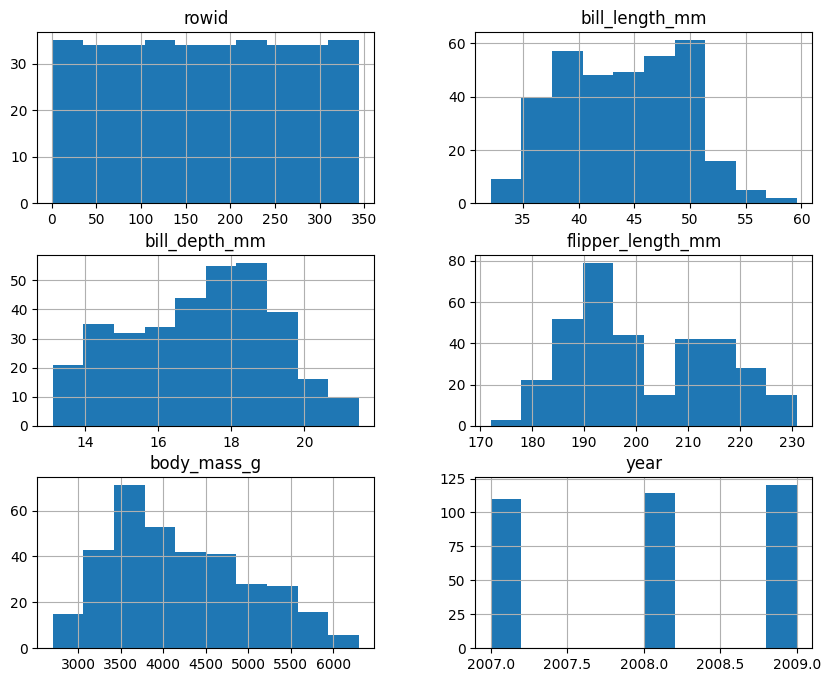

In [10]:
# Histograms for numerical features
data.hist(figsize=(10, 8))
plt.show()

Some boxplots are then drawn to compare the distribution of physical measurements across the different penguin species. The following observations can be made:
- Body Mass: There's a clear distinction between the species. Gentoo penguins tend to be heavier than both Adelie and Chinstrap penguins. There are outliers in the Chinstrap and Adelie species which may warrant further investigation.
- Bill Length: Again, Gentoo penguins tend to have longer bills compared to the other two species, and Adelie penguins have the shortest bills on average. The spread is relatively tight for each species, suggesting consistent measurements within each group.
- Bill Depth: Adelie penguins have deeper bills than the other two species. The interquartile range for the Chinstrap species is quite tight, which indicates less variability in bill depth compared to the other species.
- Flipper Length: Gentoo penguins have longer flippers compared to Adelie and Chinstrap penguins, with Adelie penguins having the shortest flippers. The boxplots show some outliers, especially in the Adelie species.

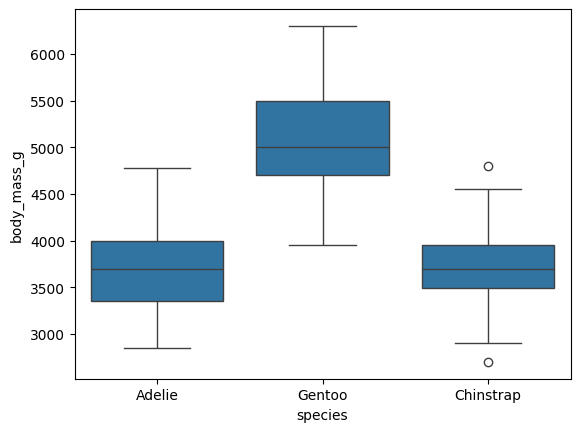

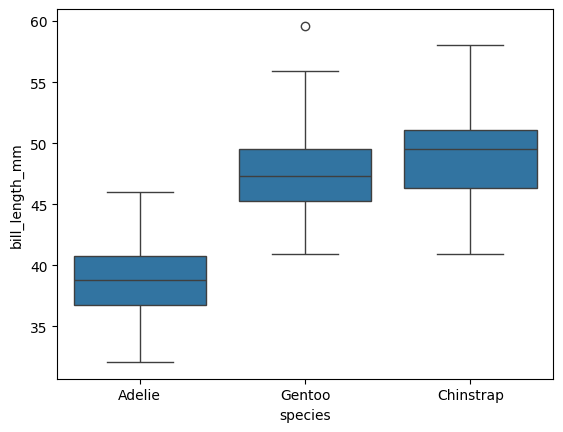

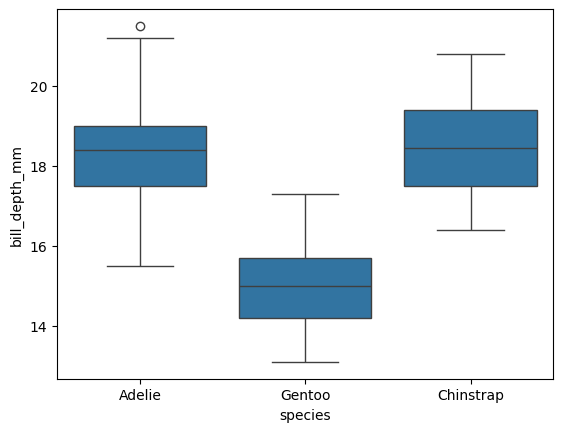

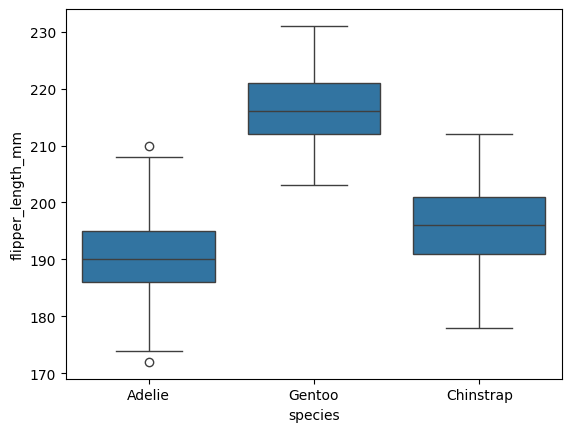

In [12]:
# Boxplot for body mass by species
sns.boxplot(x='species', y='body_mass_g', data=data)
plt.show()

# Boxplot for bill length by species
sns.boxplot(x='species', y='bill_length_mm', data=data)
plt.show()

# Boxplot for bill depth by species
sns.boxplot(x='species', y='bill_depth_mm', data=data)
plt.show()

# Boxplot for flipper length by species
sns.boxplot(x='species', y='flipper_length_mm', data=data)
plt.show()

## Relationships between variables

The pairplot is a comprehensive visual tool that shows the relationships between multiple pairs of variables in a dataset. It provides the following insights:
- Distributions: The diagonal shows the distribution of each variable for each species. We can see the distinct peaks corresponding to the species, which indicates that these features can help differentiate between the penguin species.
- Bivariate Relationships: The scatter plots below and above the diagonal show the relationships between pairs of variables. For example, there appears to be a positive correlation between flipper length and body mass; as flipper length increases, body mass tends to increase as well. This relationship seems to be present within each species and across the dataset.
- Species Clustering: Different colors for each species indicate how well-separated they are in terms of the measured features. There seems to be good clustering by species, suggesting that these features could be effective for classification tasks.

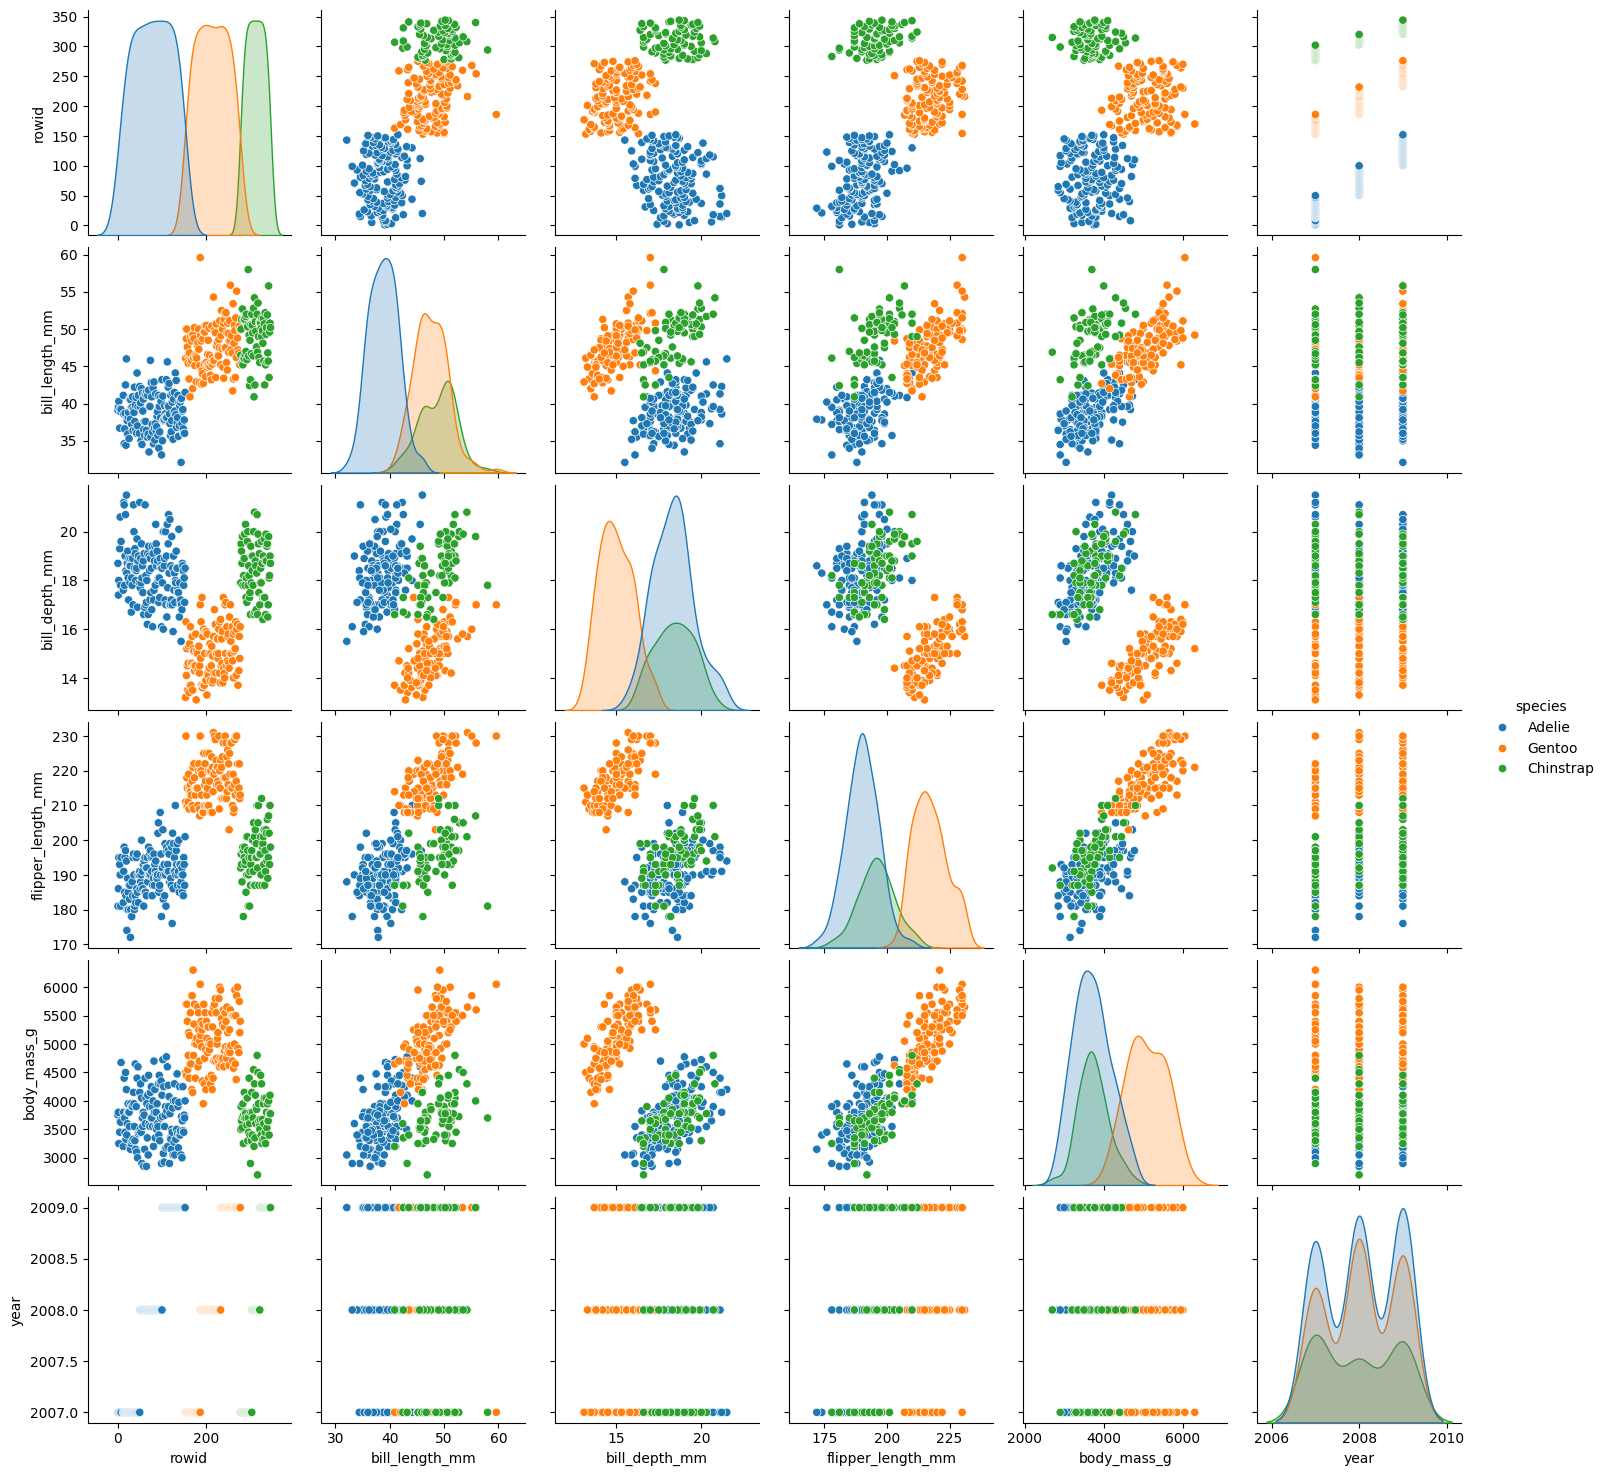

In [15]:
# Pairplot for a quick overview of relationships and distributions
sns.pairplot(data.dropna(), hue='species')
plt.show()

This scatter plot visualizes the relationship between bill length and bill depth for different species of penguins. The species are color-coded: Adelie in blue, Gentoo in orange, and Chinstrap in green. From the plot, we can make a few observations:
- Species Clusters: Each species forms a distinct cluster based on bill measurements. Adelie penguins tend to have shorter and deeper bills, while Gentoo penguins usually have longer and shallower bills. Chinstrap penguins seem to have bills that are intermediate in length and depth compared to the other two species.
- Correlation: Within each species, there's a visible trend that suggests a correlation between bill length and depth. For example, as the bill length increases for Gentoo penguins, the bill depth decreases.
- Outliers: There are a few points that stand apart from the main clusters for each species, which could be outliers or individual variations.

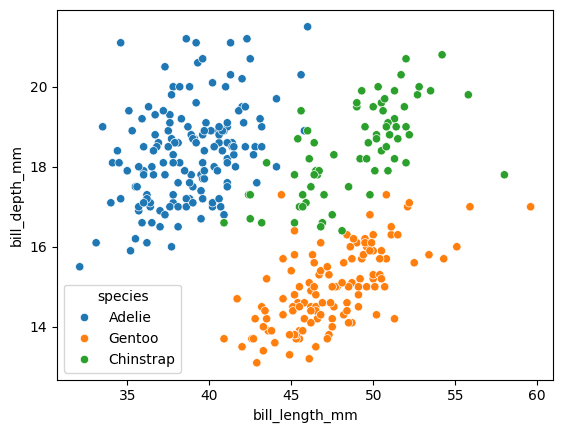

In [14]:
# Scatter plot of bill length vs. bill depth colored by species
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=data)
plt.show()

From this plot, a few observations can be made:
- Species Differences: There's a clear separation of species based on body mass and bill length. Gentoo penguins (orange) generally have both a longer bill and greater body mass. Adelie penguins (blue) tend to have shorter bills and lower body mass. Chinstrap penguins (green) are somewhat in between, but closer to Adelie in terms of body mass distribution.
- Positive Correlation: For all species, there is a positive correlation between bill length and body mass. Penguins with longer bills also tend to be heavier.
- Distinct Clusters: The clustering of data points by species indicates that these two features could be useful for classification tasks. In a classification algorithm, bill length and body mass would likely be significant features.
- Outliers: There are a few data points that stand away from the main clusters, which might be outliers.

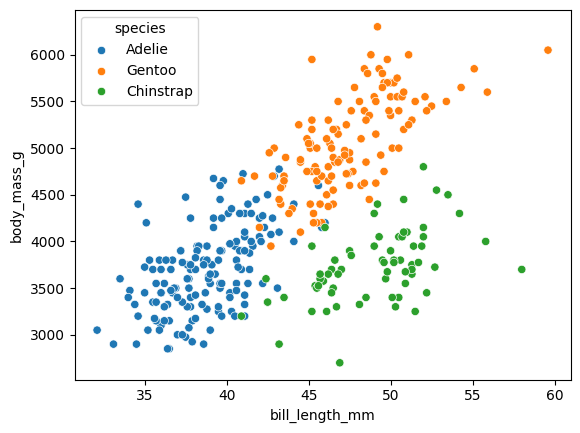

In [16]:
# Scatter plot of bill length vs. body mass colored by species
sns.scatterplot(x='bill_length_mm', y='body_mass_g', hue='species', data=data)
plt.show()

From this plot, a few observations can be made:
- Species Separation: Each species seems to occupy a distinct region of the plot. Gentoos (orange) have both long bills and long flippers. Adelies (blue) have shorter flippers and bills, and Chinstraps (green) are intermediate in flipper length but closer to Adelies in bill length.
- Positive Correlation: There is a positive correlation between flipper length and bill length. Penguins with longer flippers also tend to have longer bills, which is consistent across all three species.
- Cluster Overlap: While there's some clear clustering by species, there's a bit of overlap between Adelie and Chinstrap penguins, particularly where their bill lengths are similar. Gentoos stand apart more distinctly because of their notably longer flippers.
- Outliers: There are a few data points that stand away from the main clusters, which might be outliers.

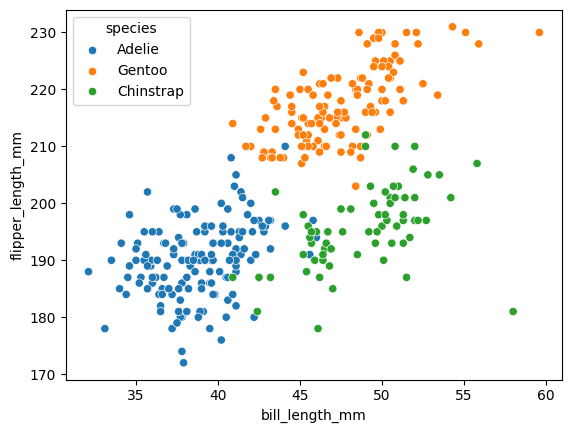

In [18]:
# Scatter plot of bill length vs. flipper length colored by species
sns.scatterplot(x='bill_length_mm', y='flipper_length_mm', hue='species', data=data)
plt.show()

In this scatter plot showcasing bill depth versus body mass for the three penguin species, we can draw several conclusions:
- Divergence Among Species: Gentoos (orange) are predominantly heavier and have shallower bills. Adelies (blue) and Chinstraps (green) appear to have a more similar range of body masses but can potentially be distinguished by bill depth, with Chinstraps tending towards the shallower end.
- Variability: There's considerable variability within each species, especially for body mass, which could be influenced by factors such as age, gender, and health.
- Negative Correlation for Gentoos: There seems to be a slight negative correlation for Gentoos, where penguins with shallower bills tend to have a higher body mass.
- Overlap: Adelies and Chinstraps overlap significantly in both bill depth and body mass, which may complicate species classification in this particular feature space.

This visualization suggests that while body mass and bill depth are informative, they might not be as distinctly separating as bill length and flipper length seen in previous plots.

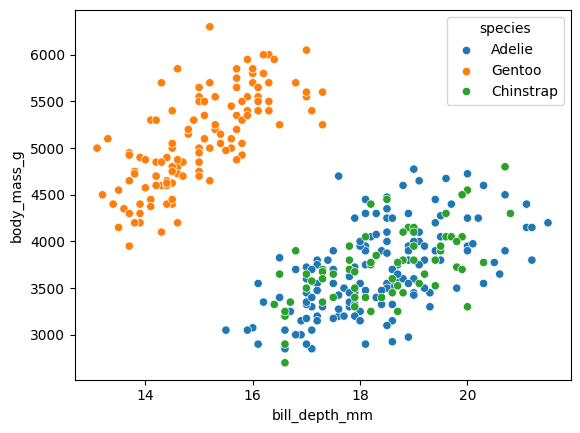

In [21]:
# Scatter plot of bill depth vs. body mass colored by species
sns.scatterplot(x='bill_depth_mm', y='body_mass_g', hue='species', data=data)
plt.show()

From this plot, a few observations can be made:
- Species Separation: Gentoos (orange) have noticeably longer flippers and shallower bills than the other species. This is consistent with what we might expect given the Gentoo's larger overall size compared to the other species.
- Overlapping Regions: Adelie (blue) and Chinstrap (green) penguins show some overlap in both flipper length and bill depth, but there is still a discernible difference. Adelies tend to have deeper bills compared to Chinstraps.
- Correlation: There seems to be a weak negative correlation for Adelie and Chinstrap penguins, where individuals with deeper bills have slightly shorter flippers, whereas for Gentoo penguins, flipper length varies less with bill depth.

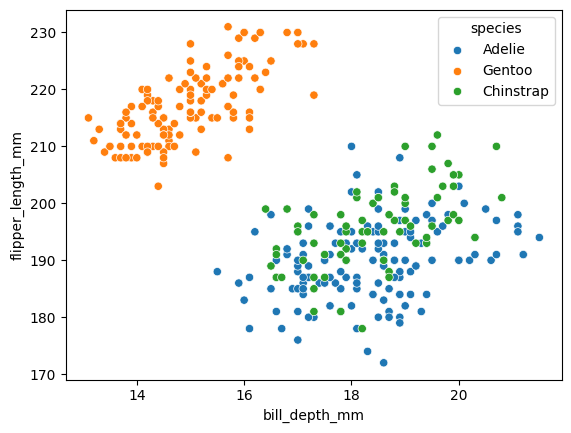

In [22]:
# Scatter plot of bill depth vs. flipper length colored by species
sns.scatterplot(x='bill_depth_mm', y='flipper_length_mm', hue='species', data=data)
plt.show()

From this plot, a few observations can be made:
- Distinct Grouping: Gentoo penguins are clearly distinguishable with longer flippers and higher body mass compared to the other two species.
- Correlation: There is a strong positive correlation between flipper length and body mass for all species, meaning larger penguins tend to have longer flippers.
- Species Overlap: Adelie and Chinstrap penguins overlap more in both body mass and flipper length, although Chinstraps tend to be a bit larger in both respects.

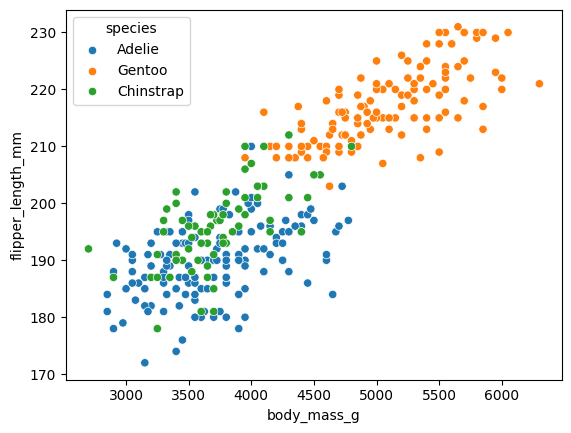

In [23]:
# Scatter plot of body mass vs. flipper length colored by species
sns.scatterplot(x='body_mass_g', y='flipper_length_mm', hue='species', data=data)
plt.show()

## Checking for outliers
Good news! The empty dataframes for all 4 features indicate that there is no outliers and the dataset indeed has no extreme values that fall outside the typical range for body mass!

Outliers for body_mass_g:
Empty DataFrame
Columns: [rowid, species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex, year, outlier]
Index: []


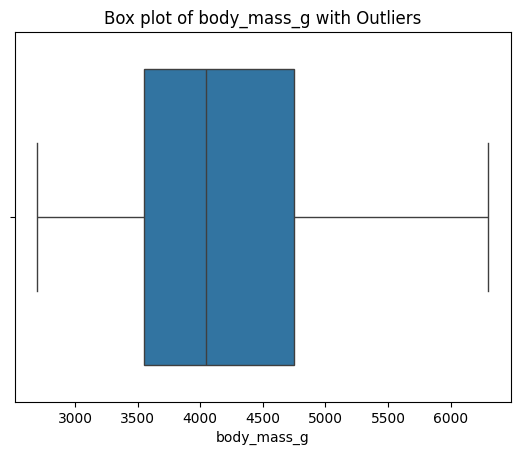

Outliers for bill_length_mm:
Empty DataFrame
Columns: [rowid, species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex, year, outlier]
Index: []


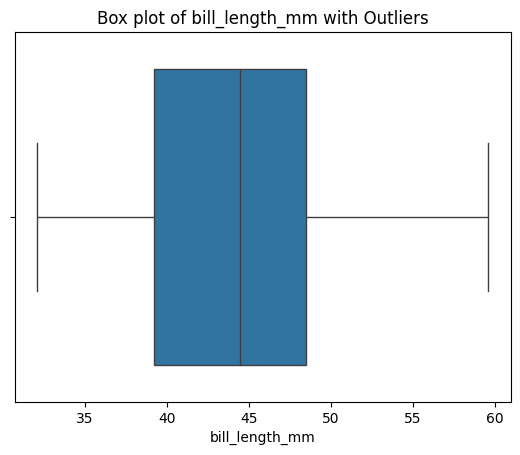

Outliers for bill_depth_mm:
Empty DataFrame
Columns: [rowid, species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex, year, outlier]
Index: []


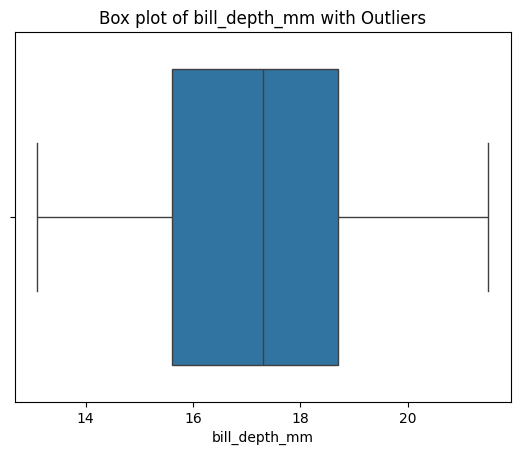

Outliers for flipper_length_mm:
Empty DataFrame
Columns: [rowid, species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex, year, outlier]
Index: []


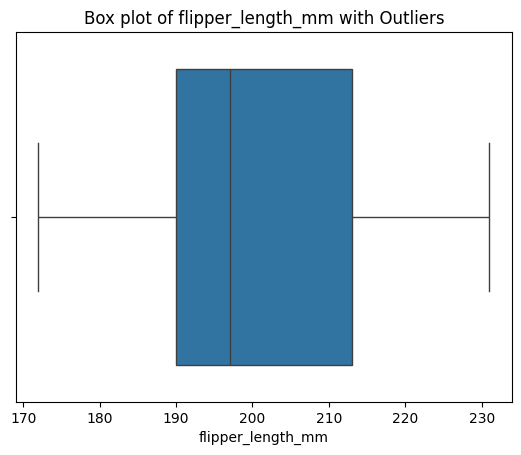

In [28]:
# Function to detect outliers
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((column < lower_bound) | (column > upper_bound))

features = ['body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
for feature in features:
    data['outlier'] = detect_outliers(data[feature])
    outliers = data[data['outlier'] == True]
    print(f"Outliers for {feature}:")
    print(outliers)

    # Plotting the boxplot
    sns.boxplot(x=data[feature])
    plt.title(f"Box plot of {feature} with Outliers")
    plt.show()

# Unsupervised Learning
From the plots above, it's clear that the penguin species exhibit distinct clusters based on their physical characteristics. This makes the dataset a good candidate for unsupervised learning, particularly clustering.

The K-means algorithm is a popular choice for clustering when we have an idea of the number of clusters to expect, which, in our case, correspond to the three penguin species.

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

What the following code do:
1. Selects relevant features for clustering.
2. Handles missing values by dropping any rows with missing data.
3. Standardizes the features, which is a critical step for K-means.
4. Performs K-means clustering with an assumption of three clusters.
5. Adds the cluster labels to your original DataFrame.
6. Visualizes the clusters using a pairplot.
7. Prints out the centroids of the clusters in the original scale of the data.

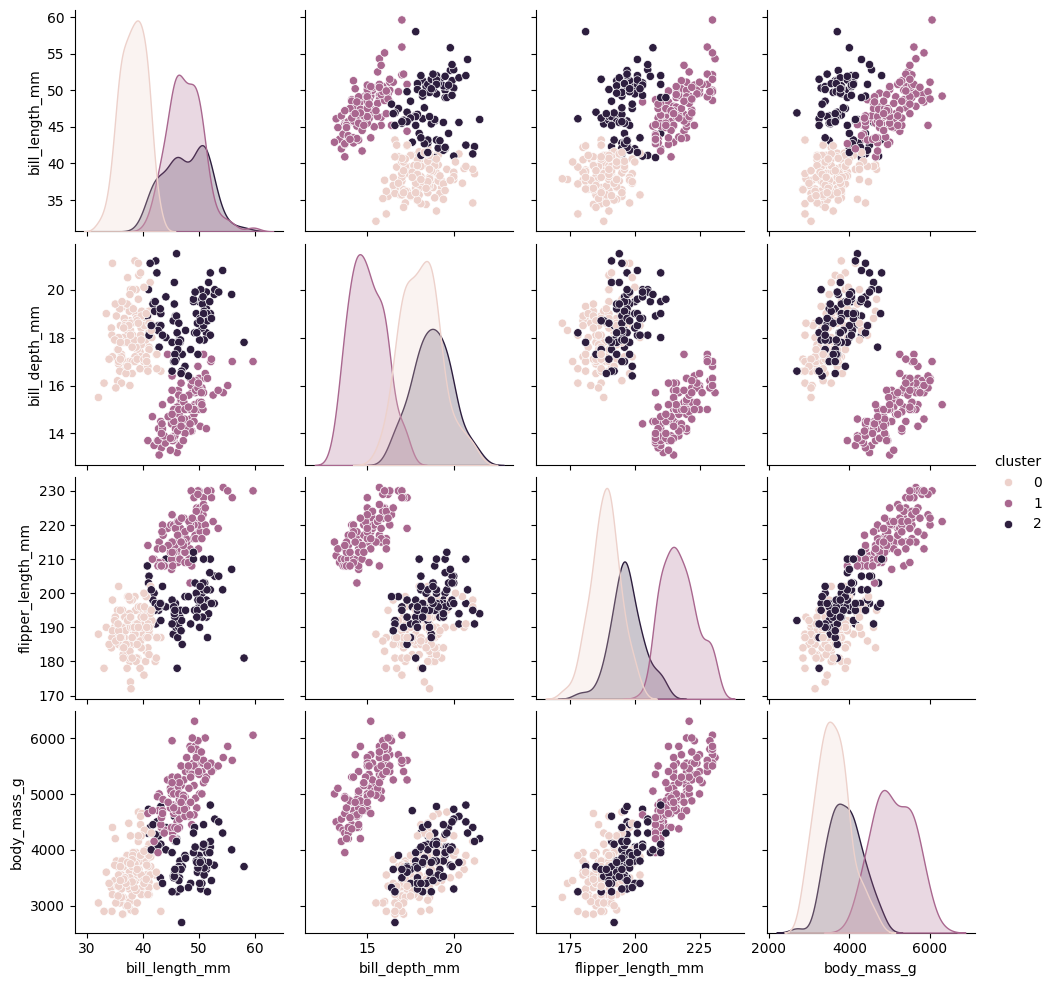

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       38.276744      18.121705         188.627907  3593.798450
1       47.568067      14.996639         217.235294  5092.436975
2       47.662353      18.748235         196.917647  3898.235294


In [37]:
features = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
# Drop rows with any missing values to ensure the clustering algorithm works correctly
features = features.dropna().reset_index(drop=True)
data = data.dropna().reset_index(drop=True)


scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_scaled)

# Add the cluster labels to dataframe
data['cluster'] = kmeans.labels_

# Visualize the clusters
sns.pairplot(data, vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], hue='cluster')
plt.show()

# Analyze the centroids
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features.columns)
print(centroids)

From the centroids you've listed for each cluster, we can see:
- Cluster 0 (first row): Represents penguins with shorter bill lengths, deeper bill depths, shorter flippers, and lighter body mass. This could be indicative of a certain species that tends to be smaller in size overall.
- Cluster 1 (second row): Has the longest flipper length and the heaviest body mass, alongside longer bill length and shallower bill depth. This suggests a larger penguin species, possibly the Gentoo based on typical species characteristics.
- Cluster 2 (third row): Features intermediate bill length and depth, flipper length, and body mass. These might correspond to the Chinstrap species, which are typically mid-sized.
## Validation of Cluster

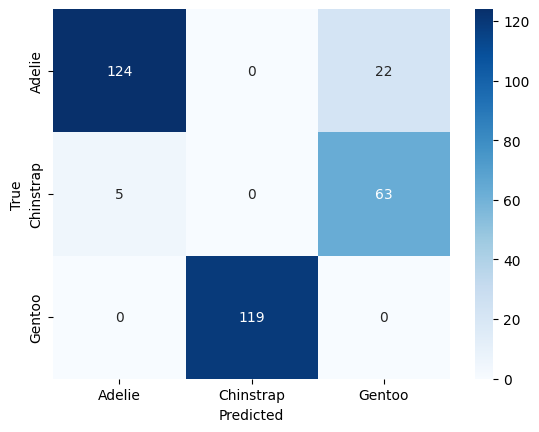

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

species_mapping = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
data['species_label'] = data['species'].map(species_mapping)

# Create the confusion matrix
cm = confusion_matrix(data['species_label'], data['cluster'])

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=species_mapping, yticklabels=species_mapping)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The confusion matrix hows the comparison between the true species labels and the species predicted by the unsupervised learning model. Here's what each part of the matrix indicates:
- Adelie: 124 were correctly clustered as Adelie, but 22 were incorrectly clustered as Gentoo.
- Chinstrap: 63 were correctly clustered as Chinstrap, while 5 were incorrectly clustered as Adelie. None were mistaken as Gentoo.
- Gentoo: All 119 Gentoos were correctly identified, with none misclassified.